In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
pd.set_option('display.max_columns', None)

In [108]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [109]:
df.shape

(660, 15)

# Q1: What is the total number of goals scored in the entire dataset?




In [110]:
df['Goals'].sum()                             

7795

### Insights-     Sum of all the goals scored by the different players in the above dataframe 

# Q2: Which player has scored the most goals as a substitution

In [189]:
df["Goals_as_substitution"] = df["Goals"] - df["Substitution "]                  #calculated field

In [190]:
most_goals_as_substitution_player = df.loc[df["Goals_as_substitution"].idxmax()]["Player Names"]
# find maximum

In [191]:
print("Player who scored the most goals as a substitution:", most_goals_as_substitution_player)

Player who scored the most goals as a substitution: Cristiano Ronaldo


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [23]:
sorted_df = df.sort_values(by="Goals", ascending=False)                         # I will sort the value by no. of goals


In [29]:
top_player=sorted_df.head(5)
top_player[['Player Names','Goals']]                                           # These are the top players name and no. of goals

,Player Names,Goals
5,Cristiano Ronaldo,42
12,Lionel Messi,37
391,Ciro Immobile,36
195,Lionel Messi,36
317,Carlos Vela,36


In [30]:
top_player['Goals'].sum()                                         # Sum of total goals scored by  them

187

# Q4: What are the top 10 countries with the most number of players in the dataset?

In [38]:
country_player_count = df.groupby("Country")["Player Names"].count()                  # use group by according to country
country_player_count.sort_values(ascending=False)                                     # sort values by descending order

Country
Brazil          100
Germany         100
Italy           100
Spain           100
England          80
France           60
 Netherlands     40
Portugal         40
USA              40
Name: Player Names, dtype: int64

### These are the name of country with total number of players

# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [163]:
len(df)                                                                  # length of original data frame

660

In [164]:
lower_quantile = df["Mins"].quantile(0.01)
upper_quantile = df["Mins"].quantile(0.99)
filtered_df = df[(df["Mins"] >= lower_quantile) & (df["Mins"] <= upper_quantile)]
len(filtered_df)                                                                        #filter using IQR

646

In [165]:
num_rows_difference = len(df) - len(filtered_df)                                          #Difference in length


In [166]:
print("Difference in the number of rows after removing outliers:", num_rows_difference)


Difference in the number of rows after removing outliers: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [48]:
sorted_df = df.sort_values(by="Goals", ascending=False)                         # I will sort the value by no. of goals
top_player=sorted_df.head(5)
top_player[['Player Names','Goals']]                                           # These are the top players name and no. of goals

,Player Names,Goals
5,Cristiano Ronaldo,42
12,Lionel Messi,37
391,Ciro Immobile,36
195,Lionel Messi,36
317,Carlos Vela,36


### These players have maximum number of goals

In [50]:
top_player[['Player Names']]                                          # All  names with ascending order

,Player Names
5,Cristiano Ronaldo
12,Lionel Messi
391,Ciro Immobile
195,Lionel Messi
317,Carlos Vela


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

In [51]:
ronaldo_df = df[df["Player Names"] == "Cristiano Ronaldo"]                           #filter the dataframe 


Text(0.5, 1.0, "Cristiano Ronaldo's Goals by Year")

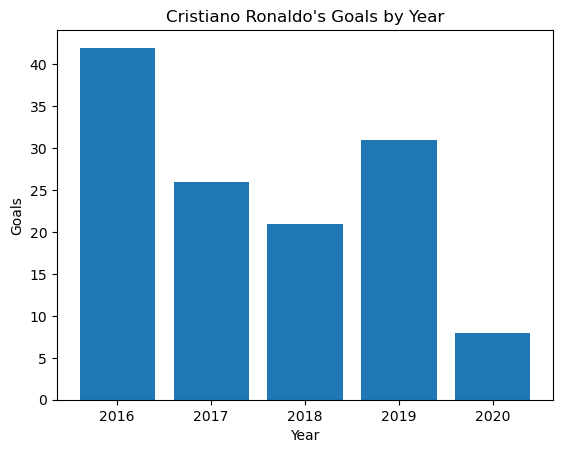

In [167]:
plt.bar(ronaldo_df["Year"], ronaldo_df["Goals"])                                 #ploting a bar graph between years and goals
plt.xlabel("Year")
plt.ylabel("Goals")
plt.title("Cristiano Ronaldo's Goals by Year")


### So from above graph we conculde that in year 2016 ronaldo score highest number of score

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [140]:

# Filtering data for the year 2019 and players Ronaldo and Messi
filtered_df = df[(df["Year"] == 2019) & (df["Player Names"].isin(["Cristiano Ronaldo", "Lionel Messi"]))]

filtered_df[['Player Names','Goals']]                                      #print noramally as pr question asked above:


,Player Names,Goals
333,Lionel Messi,25
385,Cristiano Ronaldo,31


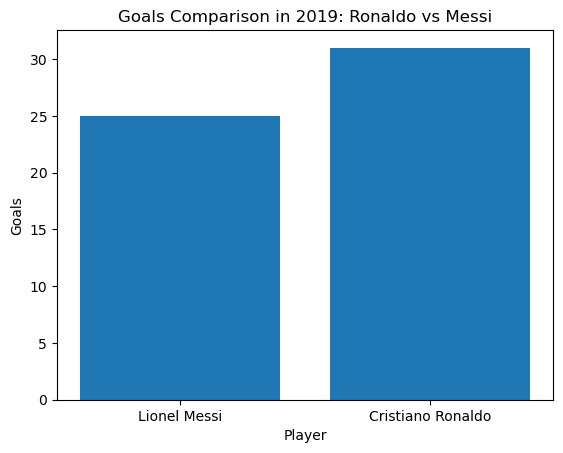

In [139]:
# Creating a bar plot to compare goals in 2019
plt.bar(filtered_df["Player Names"], filtered_df["Goals"])
plt.xlabel("Player")
plt.ylabel("Goals")
plt.title("Goals Comparison in 2019: Ronaldo vs Messi")
plt.show()

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

In [168]:
# Counting the number of occurrences of each country
country_counts = df["Country"].value_counts()
country_counts

Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: Country, dtype: int64

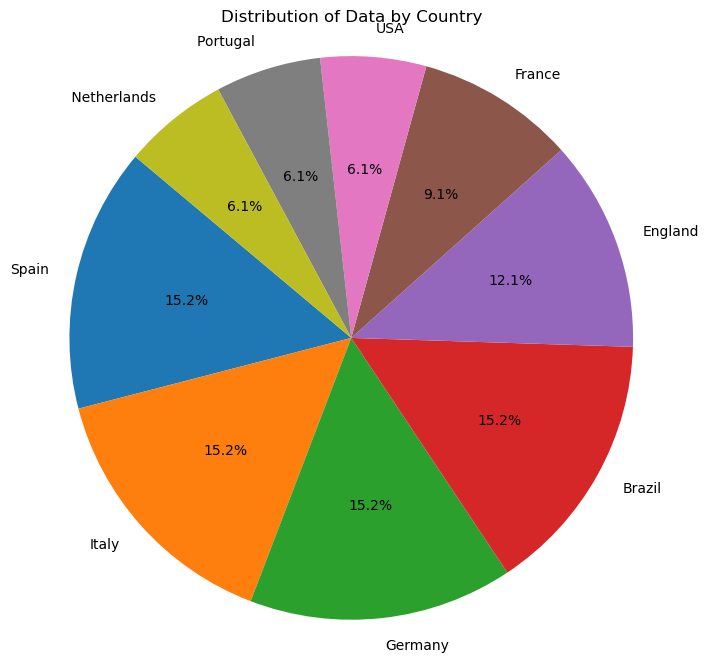

In [169]:
# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Data by Country")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

C:\Users\Swift3\AppData\Local\Temp\ipykernel_12672\588363804.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


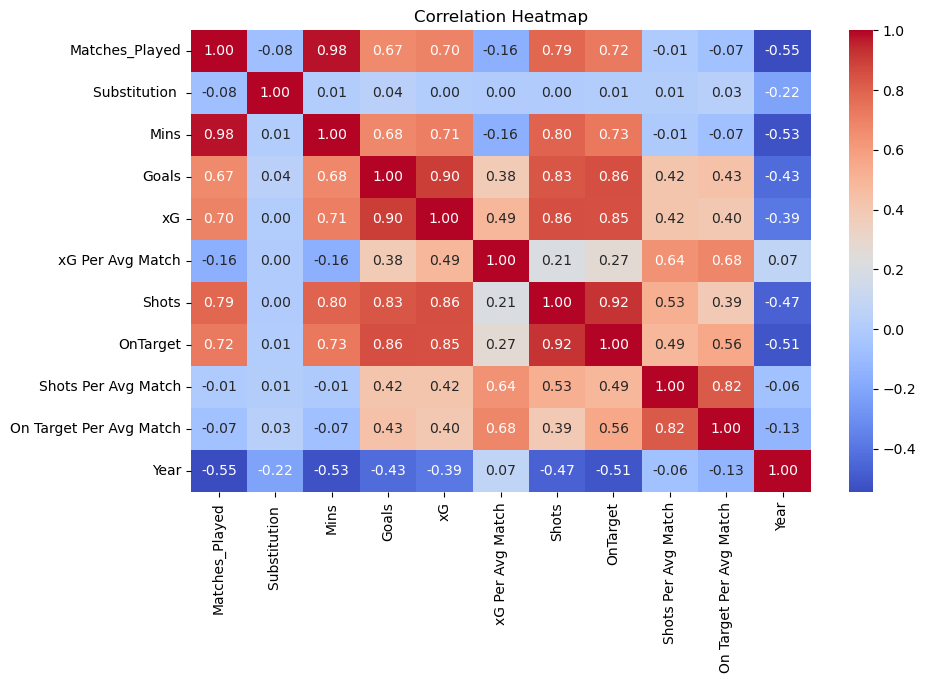

In [151]:
correlation_matrix = df.corr()                                                           # Creating a heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,  cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [174]:
year_2020_df = df[df["Year"] == 2020]

In [175]:
# Grouping by country and calculating the median OnTarget Shots
median_ontarget_by_country = year_2020_df.groupby("Country")["OnTarget"].median()

In [176]:
# Finding the country with the maximum median OnTarget Shots
country_with_max_median = median_ontarget_by_country.idxmax()

In [177]:
print("Country with the maximum median OnTarget Shots in the year 2020:", country_with_max_median)

Country with the maximum median OnTarget Shots in the year 2020:  Netherlands


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [152]:
filtered_df = df[df["Matches_Played"] > 30]


In [153]:
filtered_df["Goals_per_minute"] = filtered_df["Goals"] / filtered_df["Mins"]


C:\Users\Swift3\AppData\Local\Temp\ipykernel_12672\155181409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Goals_per_minute"] = filtered_df["Goals"] / filtered_df["Mins"]


In [154]:
best_avg_player = filtered_df.loc[filtered_df["Goals_per_minute"].idxmax()]["Player Names"]


In [155]:
mean_goals_per_minute = filtered_df["Goals_per_minute"].mean()


In [156]:
sorted_df = filtered_df.sort_values(by="Goals_per_minute", ascending=False)


In [178]:
print("Player with the best average goals per minute:", best_avg_player,"with Mean of goals per minute:", mean_goals_per_minute)


Player with the best average goals per minute: Lionel Messi with Mean of goals per minute: 0.005430139411626984


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [179]:
df["Missed_Shots"] = df["Shots"] - df["OnTarget"]                                   # calculated formluae


In [180]:
player_least_missed = df.loc[df["Missed_Shots"].idxmin()]["Player Names"]
player_most_missed = df.loc[df["Missed_Shots"].idxmax()]["Player Names"]                 #finding MIn And Max
                      

In [181]:
player_least_missed

'Esteban Burgos'

In [91]:
player_most_missed

'Cristiano Ronaldo'

# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [82]:
filtered_df = df[df["Matches_Played"] > 35]                             #filtering data


In [83]:
country_player_count = filtered_df["Country"].value_counts()
country_player_count

England    11
Spain       9
Italy       9
France      4
Brazil      1
Name: Country, dtype: int64

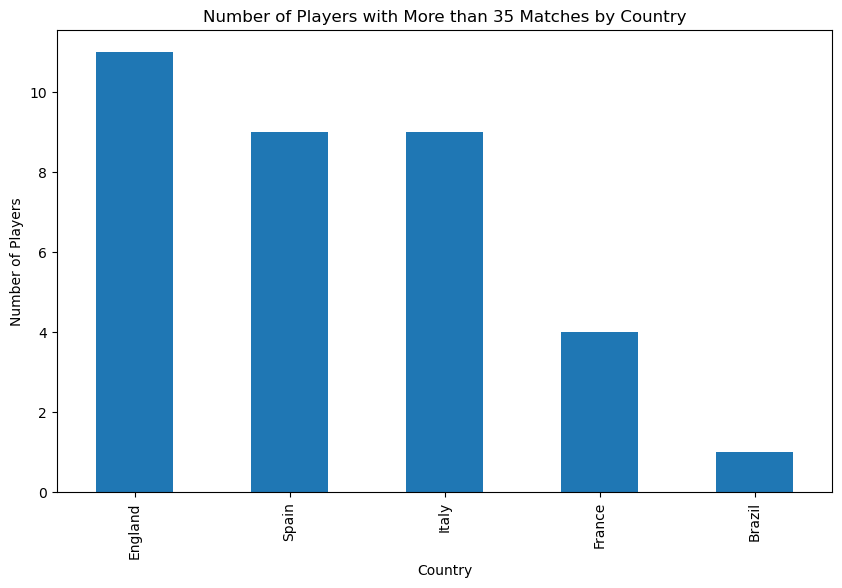

In [84]:
plt.figure(figsize=(10, 6))
country_player_count.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.title("Number of Players with More than 35 Matches by Country")
plt.show()

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

In [78]:
top_players = df.groupby("Player Names")["Goals"].sum().nlargest(5).index.tolist()
top_players

['Lionel Messi',
 'Cristiano Ronaldo',
 'Robert Lewandowski',
 'Ciro Immobile',
 'Luis Suarez']

In [79]:
top_players_df = df[df["Player Names"].isin(top_players)]


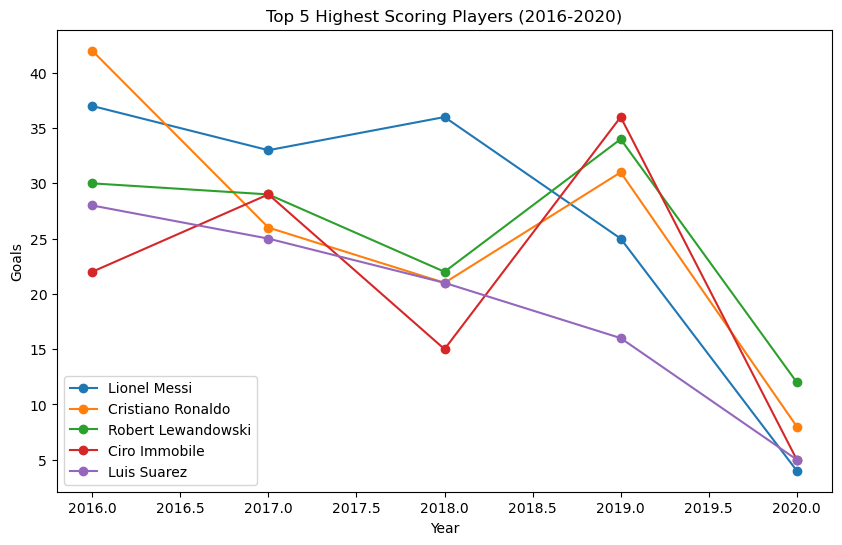

In [80]:
plt.figure(figsize=(10, 6))
for player in top_players:
    player_data = top_players_df[top_players_df["Player Names"] == player]
    plt.plot(player_data["Year"], player_data["Goals"], marker='o', label=player)

plt.xlabel("Year")
plt.ylabel("Goals")
plt.title("Top 5 Highest Scoring Players (2016-2020)")
plt.legend()

plt.show()